In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [50]:
print("Package Versions:")
import sklearn; print("  scikit-learn:", sklearn.__version__)
import scipy; print("  scipy:", scipy.__version__)
import statsmodels; print("  statsmodels:", statsmodels.__version__)

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import math as m

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
# def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
#     """Multivariate Kernel Density Estimation with Statsmodels"""
#     kde = KDEMultivariate(x, bw=bandwidth * np.ones_like(x),
#                           var_type='c', **kwargs)
#     return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def kde_python(x, x_grid, bandwidth, **kwargs):
    N = len(x)
    d = 1
    f=[]
    print(x.shape, x_grid.shape)
    for sample in x_grid:
        s=0
        for xi in x:
            s += (2*np.pi)**(-d/2) * m.exp( -0.5*( np.linalg.norm(sample-xi)/bandwidth)**2 ) 
        f.append( s/(N*bandwidth**d) )
    return np.array(f)


kde_funcs = [kde_statsmodels_u, kde_scipy, kde_sklearn,kde_python]
kde_funcnames = ['Statsmodels-U', 'Scipy', 'Scikit-learn','kde_python']



Package Versions:
  scikit-learn: 0.23.1
  scipy: 1.4.1
  statsmodels: 0.12.2


x_grid shape (1000,)
5.984826432113342e-06
5.984826432113312e-06
5.984826432113341e-06
(500,) (1000,)
5.984826432113342e-06


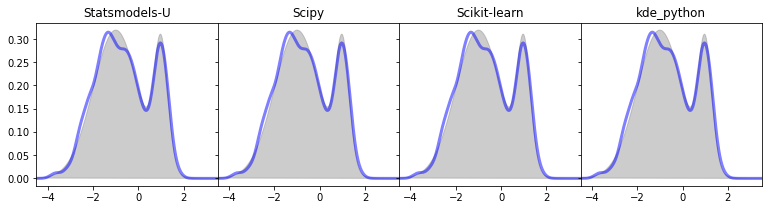

In [52]:
from scipy.stats.distributions import norm

# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 1000)
print("x_grid shape", x_grid.shape)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

# Plot the three kernel density estimates
fig, ax = plt.subplots(1, 4, sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)

for i in range(len(kde_funcs)):
    pdf = kde_funcs[i](x, x_grid, bandwidth=0.2)
    print(pdf.shape)
    ax[i].plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
    ax[i].fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
    ax[i].set_title(kde_funcnames[i])
    ax[i].set_xlim(-4.5, 3.5)
    
from IPython.display import HTML
HTML("<font color='#666666'>Gray = True underlying distribution</font><br>"
     "<font color='6666ff'>Blue = KDE model distribution (500 pts)</font>")